<a href="https://colab.research.google.com/github/abhi147p/Abhishek_INFO5731_Spring2023/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [39]:
# Write your code here

import pandas as pd
imdb_data=pd.read_csv('https://raw.githubusercontent.com/abhi147p/Abhishek_INFO5731_Spring2023/main/Assignment_3_sentiment.csv')
imdb_data.head()

,document_id,clean_text,Sentiment
0,0,entire movie looked like video game art budoka...,Positive
1,1,im dragon ball fan time ive watched back child...,Positive
2,2,ive seen movie cinema laugh much like humor mo...,Positive
3,3,honest first really concerned cgianimation sin...,Positive
4,4,dragon ball fan india delight watch theatre ma...,Positive


In [40]:
imdb_data.shape

(105, 3)

In [41]:
import nltk   #cleaning
imdb_data['Cleaned Data'] = imdb_data['clean_text'].str.replace('[^\w\s]','')  #removal of punctuation
imdb_data['Cleaned Data'] = imdb_data['Cleaned Data'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
imdb_data['Cleaned Data'] = imdb_data['Cleaned Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

<ipython-input-41-9fdee7f74273>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  imdb_data['Cleaned Data'] = imdb_data['clean_text'].str.replace('[^\w\s]','')  #removal of punctuation
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
words = []   #building document-term matrix
from nltk.tokenize import RegexpTokenizer
from gensim import corpora,models
tokenizer = RegexpTokenizer(r'\w+')
words = [tokenizer.tokenize(x) for x in pd.Series(imdb_data['Cleaned Data'])]
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(word) for word in words]

In [43]:
import gensim  #LDA model
model = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = dictionary,passes = 20)

In [44]:
model.print_topics(num_topics = 10, num_words = 5)

[(0,
  '0.026*"dragon" + 0.026*"ball" + 0.026*"fan" + 0.026*"movie" + 0.026*"great"'),
 (1,
  '0.002*"movie" + 0.002*"story" + 0.002*"dragon" + 0.002*"cell" + 0.002*"like"'),
 (2,
  '0.036*"movie" + 0.019*"really" + 0.019*"great" + 0.019*"gohan" + 0.019*"see"'),
 (3,
  '0.038*"movie" + 0.027*"story" + 0.023*"cell" + 0.023*"like" + 0.019*"character"'),
 (4,
  '0.043*"movie" + 0.026*"piccolo" + 0.026*"really" + 0.017*"cell" + 0.017*"gohan"'),
 (5,
  '0.029*"movie" + 0.018*"dragon" + 0.018*"ball" + 0.018*"time" + 0.018*"piccolo"'),
 (6,
  '0.034*"movie" + 0.034*"watch" + 0.027*"time" + 0.027*"dragon" + 0.027*"ball"'),
 (7,
  '0.188*"goku" + 0.188*"anime" + 0.188*"best" + 0.161*"worled" + 0.161*"kakaroto"'),
 (8,
  '0.055*"ball" + 0.055*"dragon" + 0.046*"film" + 0.028*"fan" + 0.018*"really"'),
 (9,
  '0.002*"story" + 0.002*"like" + 0.002*"movie" + 0.002*"cell" + 0.002*"original"')]

In [45]:
!pip install biterm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from biterm.btm import oBTM
from biterm.utility import vec_to_biterms, topic_summuary

# Summary and feature names of topics for each cluster.
biterm = imdb_data['Cleaned Data'].values
vector = TfidfVectorizer(stop_words='english')
X_tfidf =vector.fit_transform(biterm).toarray() # converting to tfidf matrix


text = np.array(vector.get_feature_names_out()) # getting the feature names
words = vec_to_biterms(X_tfidf)

model = oBTM(num_topics=10, V=text)
model_lda= model.fit_transform(words, iterations=10)


topic_summuary(model.phi_wz.T, X_tfidf, text, 10) # getting the summary of our topics

100%|██████████| 10/10 [05:09<00:00, 30.98s/it]


Topic 0 | Coherence=-11.52 | Top words= gamma fighting fight super pan great perfect piccolo shine movie
Topic 1 | Coherence=-38.32 | Top words= movie really time gohan piccolo love new mix end think
Topic 2 | Coherence=-43.25 | Top words= like better great make need want far write purchase tried
Topic 3 | Coherence=-18.66 | Top words= gohan vegeta goku ball style dragon time saw movie piccolo
Topic 4 | Coherence=-20.16 | Top words= awesome new finally wish power fact broly villain im beloved
Topic 5 | Coherence=-28.97 | Top words= good people life cinema broly like dragon actually make better
Topic 6 | Coherence=-16.53 | Top words= cell form vegeta dr good thing great goku dragon piccolo
Topic 7 | Coherence=-30.44 | Top words= original transformation style looked movie super ball art cell slightly
Topic 8 | Coherence=-26.67 | Top words= laugh change thing max villain bad didnt reason story little
Topic 9 | Coherence=-14.49 | Top words= sense cgi make character overall ball story movie

{'coherence': [-11.519828732799619,
  -38.31771733772896,
  -43.2457537339068,
  -18.658882881492648,
  -20.161759700133146,
  -28.970468828874246,
  -16.527906901376276,
  -30.444154924774267,
  -26.674369585270355,
  -14.494989327634773],
 'top_words': [array(['gamma', 'fighting', 'fight', 'super', 'pan', 'great', 'perfect',
         'piccolo', 'shine', 'movie'], dtype=object),
  array(['movie', 'really', 'time', 'gohan', 'piccolo', 'love', 'new',
         'mix', 'end', 'think'], dtype=object),
  array(['like', 'better', 'great', 'make', 'need', 'want', 'far', 'write',
         'purchase', 'tried'], dtype=object),
  array(['gohan', 'vegeta', 'goku', 'ball', 'style', 'dragon', 'time',
         'saw', 'movie', 'piccolo'], dtype=object),
  array(['awesome', 'new', 'finally', 'wish', 'power', 'fact', 'broly',
         'villain', 'im', 'beloved'], dtype=object),
  array(['good', 'people', 'life', 'cinema', 'broly', 'like', 'dragon',
         'actually', 'make', 'better'], dtype=object),
 

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [290]:
# Write your code here

# Write your code here
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

imdb_data = pd.read_csv('https://raw.githubusercontent.com/abhi147p/Abhishek_INFO5731_Spring2023/main/Assignment_3_sentiment.csv')
imdb_data.head()

,document_id,clean_text,Sentiment
0,0,entire movie looked like video game art budoka...,Positive
1,1,im dragon ball fan time ive watched back child...,Positive
2,2,ive seen movie cinema laugh much like humor mo...,Positive
3,3,honest first really concerned cgianimation sin...,Positive
4,4,dragon ball fan india delight watch theatre ma...,Positive


In [291]:
import nltk   #cleaning
imdb_data['Cleaned Data'] = imdb_data['clean_text'].str.replace('[^\w\s]','')  #removal of punctuation
imdb_data['Cleaned Data'] = imdb_data['Cleaned Data'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
imdb_data['Cleaned Data'] = imdb_data['Cleaned Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

<ipython-input-291-9fdee7f74273>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  imdb_data['Cleaned Data'] = imdb_data['clean_text'].str.replace('[^\w\s]','')  #removal of punctuation
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [292]:
imdb_data['Sentiment'].value_counts()

Positive    58
Neutral     31
Negative    16
Name: Sentiment, dtype: int64

In [293]:
tfidf_vector = TfidfVectorizer()
X_tfidf = tfidf_vector.fit_transform(imdb_data['Cleaned Data'])
print(X_tfidf.shape)

(105, 661)


In [294]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
mnb = MultinomialNB()
svm = LinearSVC()

# splitting data to 80-20 train and test data
x_train, x_test, y_train, y_test = train_test_split(X_tfidf,
                                                    imdb_data['Sentiment'], 
                                                    test_size=0.2, 
                                                    random_state=42)
model_mnb = mnb.fit(x_train,y_train) # training the model

In [295]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred_mnb = model_mnb.predict(x_test)
print('Accuracy of multinomial naive bayes %s' % accuracy_score(y_pred_mnb,y_test))
print(classification_report(y_test,y_pred_mnb))

Accuracy of multinomial naive bayes 0.9047619047619048
              precision    recall  f1-score   support

    Negative       1.00      0.75      0.86         4
     Neutral       0.60      1.00      0.75         3
    Positive       1.00      0.93      0.96        14

    accuracy                           0.90        21
   macro avg       0.87      0.89      0.86        21
weighted avg       0.94      0.90      0.91        21



In [296]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=5)
print("cross validation using MNB",scores.mean())

cross validation using MNB 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [297]:
model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)

In [298]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

    Negative       1.00      0.75      0.86         4
     Neutral       0.60      1.00      0.75         3
    Positive       1.00      0.93      0.96        14

    accuracy                           0.90        21
   macro avg       0.87      0.89      0.86        21
weighted avg       0.94      0.90      0.91        21



In [299]:
print('Accuracy of svm %s' % accuracy_score(y_pred_svm,y_test))

Accuracy of svm 0.9047619047619048


In [300]:
scores = cross_val_score(svm, x_test, y_test, cv=10)
print("cross validation using svm",scores.mean())

cross validation using svm 0.7166666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
%ls
%cd drive/MyDrive/

drive/  sample_data/
/content/drive/MyDrive


In [50]:
%ls

'After cleaning data.csv'         classification_train.csv   stsa-test.txt
 Amazon_Unlocked_Mobile.csv      'Colab Notebooks'/          stsa-train.txt
 Assignment1_denton_housing.csv   regression_test.csv        test.csv
 classification_test.csv          regression_train.csv       train.csv


In [261]:
# Write your code here

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [262]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [263]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [264]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [265]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [266]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [267]:
import numpy as np
# replacing 
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
train_data.fillna(-1000, inplace=True)

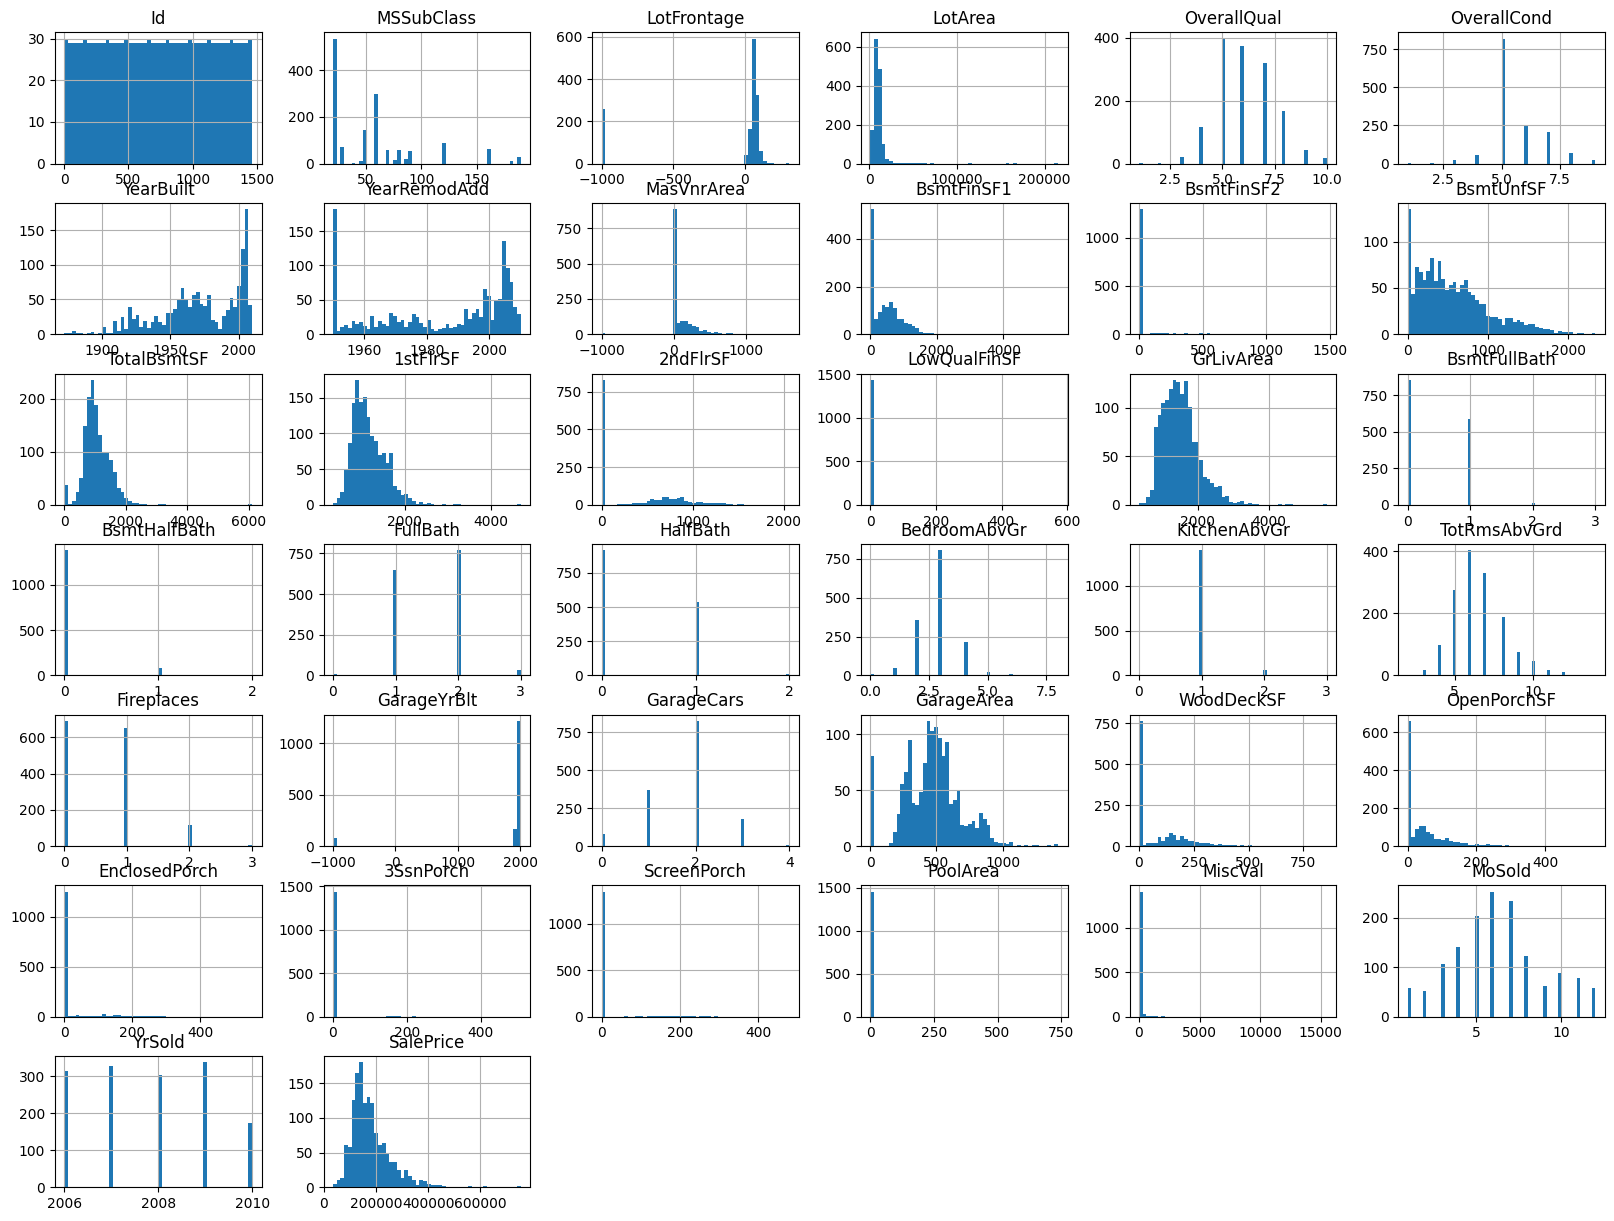

In [268]:
%matplotlib inline
# analyzing the each column of our train data
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [269]:
cor = train_data.corr() # getting the corr of data for each and every column
cor

<ipython-input-269-8f9558db501a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = train_data.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.018182,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.054666,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.003902,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.027654,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.018182,-0.003902,1.000000,-0.105287,0.048497,-0.028570,-0.042635,0.038216,0.003760,-0.066568,...,-0.080899,-0.015530,0.027870,-0.017474,0.000767,0.008683,-0.077972,0.016695,-0.020835,0.013931
LotArea,-0.033226,-0.139781,-0.105287,1.000000,0.105806,-0.005636,0.014228,0.013788,0.089449,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.048497,0.105806,1.000000,-0.091932,0.572323,0.550684,0.348498,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.028570,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.097248,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,-0.042635,0.014228,0.572323,-0.375983,1.000000,0.592855,0.259081,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.038216,0.013788,0.550684,0.073741,0.592855,1.000000,0.139078,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.054666,0.027654,0.003760,0.089449,0.348498,-0.097248,0.259081,0.139078,1.000000,0.219951,...,0.152855,0.091325,-0.101645,0.020683,0.064263,0.012783,-0.024497,-0.013075,-0.008822,0.411796
BsmtFinSF1,-0.005024,-0.069836,-0.066568,0.214103,0.239666,-0.046231,0.249503,0.128451,0.219951,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [270]:
cor["YrSold"].sort_values(ascending=False)

YrSold           1.000000
BsmtFullBath     0.067049
OverallCond      0.043950
YearRemodAdd     0.035743
BsmtFinSF2       0.031706
KitchenAbvGr     0.031687
WoodDeckSF       0.022270
3SsnPorch        0.018645
BsmtFinSF1       0.014359
ScreenPorch      0.010694
MiscVal          0.004906
Id               0.000712
MasVnrArea      -0.008822
EnclosedPorch   -0.009916
HalfBath        -0.010269
GarageYrBlt     -0.011125
1stFlrSF        -0.013604
YearBuilt       -0.013618
LotArea         -0.014261
TotalBsmtSF     -0.014969
FullBath        -0.019669
LotFrontage     -0.020835
MSSubClass      -0.021407
Fireplaces      -0.024096
OverallQual     -0.027347
GarageArea      -0.027378
2ndFlrSF        -0.028700
LowQualFinSF    -0.028921
SalePrice       -0.028923
TotRmsAbvGrd    -0.034516
BedroomAbvGr    -0.036014
GrLivArea       -0.036526
GarageCars      -0.039117
BsmtUnfSF       -0.041258
BsmtHalfBath    -0.046524
OpenPorchSF     -0.057619
PoolArea        -0.059689
MoSold          -0.145721
Name: YrSold

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

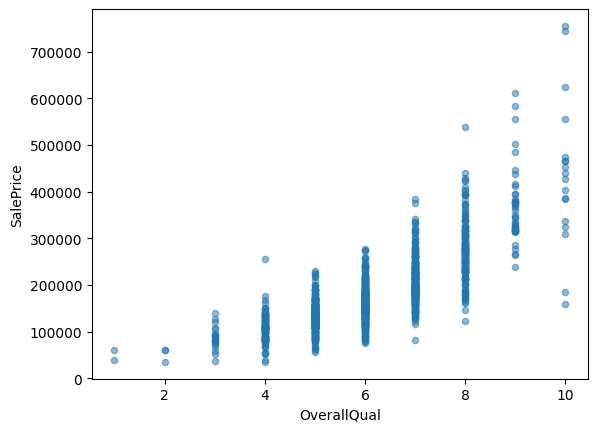

In [271]:
# plotting the scatter plot for OverallQual vs SalePrice
train_data.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

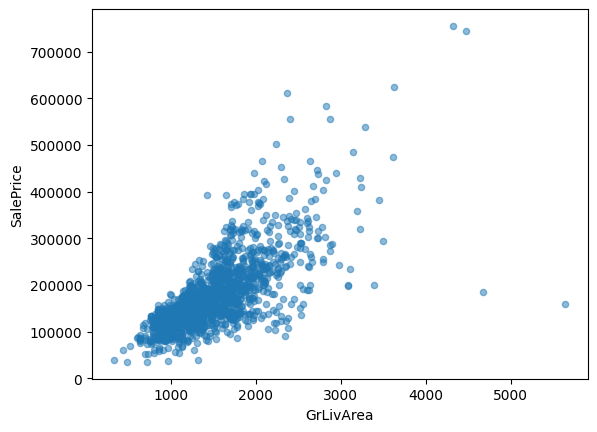

In [272]:
# plotting the scatter plot for GrLivArea vs SalePrice
train_data.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

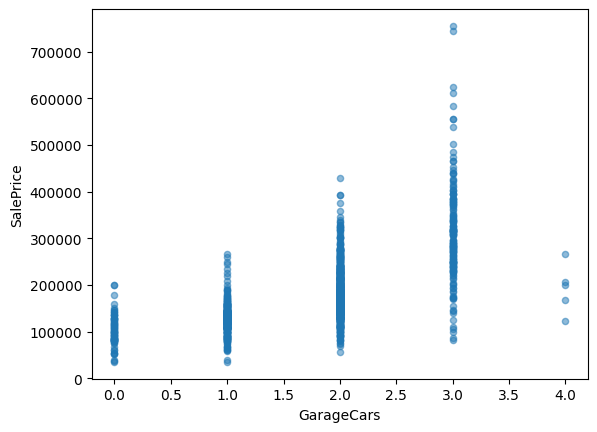

In [273]:
# plotting the scatter plot for GarageCars vs SalePrice
train_data.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)

<Axes: >

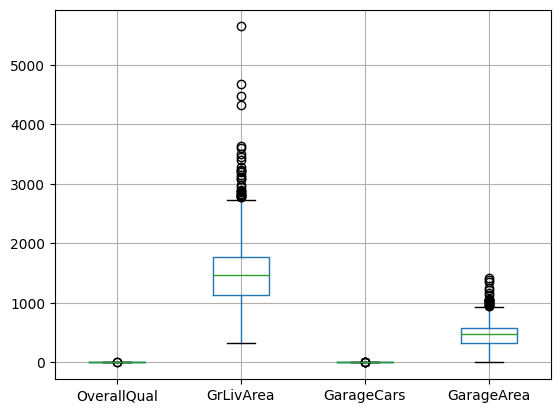

In [274]:
# plotting the box plot for columns for finding outliers
train_data.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

<Axes: >

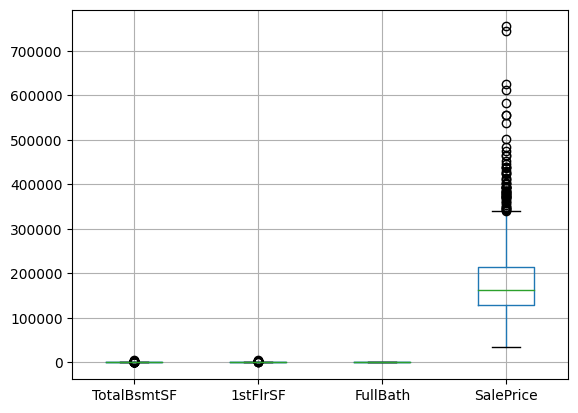

In [275]:
# plotting the box plot for columns for finding outliers
train_data.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

In [276]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [277]:
# converting the categorical to numerical using label encoder.
columns = ('GarageCond',
           'LandContour', 
           'RoofStyle', 
           'RoofMatl', 
           'Heating', 
           'MiscFeature', 
           'SaleType', 
           'GarageType',
           'Electrical', 
           'SaleCondition', 
           'Foundation',
           'Exterior1st', 
           'Exterior2nd',
           'MasVnrType', 
           'FireplaceQu', 
           'LotShape', 
           'Neighborhood', 
           'Condition1', 
           'Condition2', 
           'Utilities', 
           'BldgType', 
           'HouseStyle',
           'PoolQC', 
           'BsmtQual', 
           'BsmtCond', 
           'GarageQual',
           'BsmtExposure', 
           'ExterQual', 
           'ExterCond',
           'HeatingQC', 
           'KitchenQual', 
           'BsmtFinType1',
           'BsmtFinType2', 
           'Functional', 
           'Fence', 
           'GarageFinish', 
           'LandSlope',
           'LotShape', 
           'PavedDrive', 
           'Street',
           'Alley', 
           'CentralAir', 
           'MSSubClass', 
           'OverallCond', 
           'YrSold',
           'MoSold', 
           'MSZoning',
           'LotConfig')

In [278]:
from sklearn.preprocessing import LabelEncoder
for i in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train_data[i].values))
    train_data[i] = encoder.transform(list(train_data[i].values))

In [279]:
for j in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test_data[j].values))
    test_data[j] = encoder_test.transform(list(test_data[j].values))

In [280]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# scaling the data for better prediction
scaler = MinMaxScaler()
X = train_data.drop("SalePrice", axis=1)
y = train_data["SalePrice"].values.reshape(-1,1)
X_scaled_min_max = scaler.fit_transform(X)
X_scaled_min_max_df = pd.DataFrame(X_scaled_min_max, columns=X.columns)

X_scaled_min_max_test = scaler.fit_transform(test_data)
X_scaled_min_max_df_test = pd.DataFrame(X_scaled_min_max_test, columns=test_data.columns)

In [281]:
# splitting data into train and test 80-20
x_train, x_test, y_train, y_test = train_test_split(X_scaled_min_max, y, test_size=0.2, random_state=0)

In [282]:
x_train.shape, y_train.shape

((1168, 80), (1168, 1))

In [283]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# training the model 
regressor.fit(x_train, y_train)

LinearRegression()

In [284]:
y_pred = regressor.predict(x_test) # predicting the model
print('Linear Regression R squared": %.4f' % regressor.score(x_test, y_test)) # accuracy of the model

Linear Regression R squared": 0.4851


In [285]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin = mean_squared_error(y_pred, y_test) # Mean squared error
lin_r = np.sqrt(lin)
print(lin_r)

59631.70495455254


In [286]:
X_scaled_min_max_df_test.dropna(inplace=True) # dropping na instances

In [287]:
y_pred_vals = [x[0] for x in y_pred] # getting pred values

In [288]:
# predicted sales price for test data
predicted = regressor.predict(X_scaled_min_max_df_test)
predicted

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[2.11466340e+16],
       [6.00214783e+16],
       [5.20600180e+16],
       ...,
       [1.02949570e+16],
       [8.31595365e+16],
       [5.04113917e+16]])

In [289]:
results = {"Predicted Prices": y_pred_vals}
# creating the data frame for predicted and actual values and how much diff btw them.
df_val = pd.DataFrame(results)
df_val["Actual Prices"] = y_test
df_val["Percentage Difference"] = round(abs((df_val["Predicted Prices"] - df_val["Actual Prices"]) / df_val["Actual Prices"]) * 100,2)
df_val.head()

,Predicted Prices,Actual Prices,Percentage Difference
0,189176.898973,200624,5.71
1,170504.898973,133000,28.20
2,94704.898973,110000,13.90
3,221176.898973,192000,15.20
4,87576.898973,88000,0.48
